# Project - KNN
## Phi Le
### DATA - 4319

KNN stands for K-Nearest Neighbors. This Data Science algorithm employs both classification and regression problems.

The KNN algorithm considers the complete dataset as the training dataset. After training the model using the KNN algorithm, we try to predict the outcome of a new data point.

Here, the KNN algorithm searches the entire data set for identifying the k most similar or nearest neighbors of that data point. It then predicts the outcome based on these k instances.

For finding the nearest neighbors of a data instance, we can use various distance measures like Euclidean distance, Hamming distance, etc.

To better understand, let us consider the following example.

![](https://i1.wp.com/techvidvan.com/tutorials/wp-content/uploads/sites/2/2020/03/KNN-Algorithm.jpg?ssl=1)

Here we have represented the two classes A and B by the circle and the square respectively.

Let us assume the value of k is 3.

Now we will first find three data points that are closest to the new data item and enclose them in a dotted circle. Here the three closest points of the new data item belong to class A. Thus, we can say that the new data point will also belong to class A.

Now you all might be thinking that how we assumed k=3?

The selection of the value of k is a very critical task. You should take such a value of k that it is neither too small nor too large. Another simpler approach is to take $k = \sqrt{n}$ where n is the number of data points.

**Algorithm**	
A case is classified by a majority vote of its neighbors, with the case being assigned to the class most common amongst its K nearest neighbors measured by a distance function. If K = 1, then the case is simply assigned to the class of its nearest neighbor. 		


![](https://www.saedsayad.com/images/KNN_similarity.png)

It should also be noted that all three distance measures are only valid for continuous variables. In the instance of categorical variables the Hamming distance must be used. It also brings up the issue of standardization of the numerical variables between 0 and 1 when there is a mixture of numerical and categorical variables in the dataset.

### Project Example

#### Information about the dataset

The dataset can be found from here (https://archive.ics.uci.edu/ml/datasets/abalone). This is the abalone data use for testing machine learning. The goal is to use physical measurements to predict the age of the abalone.

### Import packages and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns

url = (
    "https://archive.ics.uci.edu/ml/machine-learning-databases"
    "/abalone/abalone.data"
)
abalone = pd.read_csv(url, header=None)

In [2]:
#Check the data
abalone.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
abalone.columns = [
    "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole weight",
    "Shucked weight",
    "Viscera weight",
    "Shell weight",
    "Rings",
]
abalone = abalone.drop("Sex", axis=1)


### Descriptive Statistics From the Abalone Dataset

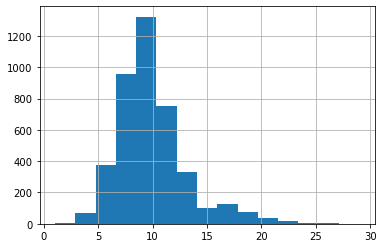

In [4]:
abalone["Rings"].hist(bins=15)
plt.show()

In [5]:
correlation_matrix = abalone.corr()
correlation_matrix["Rings"]

Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

### Define “Nearest” Using a Mathematical Definition of Distance

In [6]:
a = np.array([2, 2])
b = np.array([4, 4])
np.linalg.norm(a - b)

2.8284271247461903

### Find the k Nearest Neighbors

In [7]:
X = abalone.drop("Rings", axis=1)
X = X.values
y = abalone["Rings"]
y = y.values

### Fit kNN in Python Using scikit-learn

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=12345
)

knn_model = KNeighborsRegressor(n_neighbors=3)

In [9]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

### Using scikit-learn to Inspect Model Fit

In [10]:
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

1.653705966446084

In [11]:
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

2.375417924000521

### Plotting the Fit of Your Model

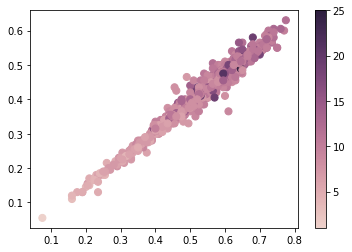

In [12]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap=cmap
)
f.colorbar(points)
plt.show()